# CBSD Project - The Personality Inventory for DSM-5 (shortPID_5)
## Ngoc Diem Le, Sebastian Rojas Ardila

Our data was collected based on the responses of 519 people in 25 questions to evaluate personality and related disorders based on the dimensional trait model (DSM-5)
* **Number of items**: 25
* **Likert scale**: 1-4 (Very False or Often False to Very True or Often True). 
* **Paricipants**: 
  - Honest: 519
  - Dishonest (Faker): 519
* **Study design**: Within subject
* **Procedure**: Subjects were asked to answer twice a questionnaire developed to identify mental disorders, following different instructions: the first time by answering honestly, while the second time by pretending to have a mental disorder. Each participant responded twice, once honestly and once faking.
* **FAKING BAD** we expect *liars to give higher responses than truth-tellers* because they exaggerate mental disorders symptoms. 
* **Personality Trait Domain**:  
 - Negative affect (8, 9, 10, 11, 15)
 - Detachment (4, 13, 14, 16, 18)
 - Antagonism (17, 19, 20, 22, 25)
 - Disinhibition (1, 2, 3, 5, 6)
 - Psychoticism (7, 12, 21, 23, 24)

 

#**Questionaire**:
- Negative Affect: feeling of emotional distress, negative emotions and poor self-concept (failed to achieve a goal or to avoid a threat)
    - 8 - I worry about almost everything
    - 9 - I get emotional easily, often for very little reason
    - 10 - I fear being alone in life more than anything else
    - 11 - I get stuck on one way of doing things, even when it's clear it won't work
    - 15 - I get irritated easily by all sorts of things

- Detachment: being disconnected or disengaged from the feelings of other people, a coping mechanism when people are faced with stressful or difficult situations
    - 4 - I often feel like nothing I do really matters
    - 13 - I steer clear of romantic relationships
    - 14 - I'm not interested in making friends
    - 16 - I don't like to get too close to people
    - 18 - I rarely get enthusiastic about anything

- Antagonism is low pole of Agreeableness
    - 17 - It's no big deal if I hurt other people's feelings
    - 19 - I crave attention
    - 20 - I often have to deal with people who are less important than me
    - 22 - I use people to get what I want
    - 25 - It is easy for me to take advantage of others

- Disinhibition is saying or doing something on a whim, without thinking in advance of what could be the unwanted or even dangerous result
    - 1 - People would describe me as reckless 
    - 2 - I feel like I act totally on impulse
    - 3 - Even though I know better, I can't stop making rash decisions
    - 5 - Others see me as irresponsible
    - 6 - I'm not good at planning ahead

- Psychoticism 
    - 7 - My thoughts often don't make sense to others
    - 12 - I have seen things that weren't really there
    - 21 - I often have thoughts that make sense to me but that other people say are strange
    - 23 - I often "zone out" and then suddenly come to and realize that a lot of time has passed
    - 24 - Things around me often feel unreal, or more real than usual

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Libraries

First of all, let's import some essential libraries.

In [ ]:
!pip install imodels

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import tree

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

from collections import OrderedDict

import xgboost as xgb
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder 
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression
from sklearn.svm import LinearSVR

## Load data and Pre-processing


In [ ]:
dfSPD = pd.read_csv('/content/drive/MyDrive/CBSD-Project/sPID-5_df.csv')

A quick look on our data with the first five responses.

In [ ]:
dfSPD.head()

,PID1,PID2,PID3,PID4,PID5,PID6,PID7,PID8,PID9,PID10,PID11,PID12,PID13,PID14,PID15,PID16,PID17,PID18,PID19,PID20,PID21,PID22,PID23,PID24,PID25,CONDITION
0,1,4,3,2,1,3,3,4,4,3,2,1,1,2,1,1,1,4,4,2,1,2,1,2,1,H
1,3,3,4,4,1,1,3,4,4,2,1,1,3,1,3,1,1,1,4,3,2,1,1,1,3,H
2,3,2,1,2,1,1,2,4,4,3,1,1,1,1,2,1,2,2,3,3,2,3,1,1,2,H
3,1,1,1,2,1,2,2,3,3,1,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,H
4,3,3,2,1,3,2,1,2,2,1,2,1,1,1,1,1,2,2,3,3,1,3,1,1,3,H


In this step, we created another variable named CONDITION_BINARY to indicate Honest or Dishonest status, in which 0s for Honest responses and 1s for Dishonest responses. We chose 1 for Dishonest response because based on our objective, Dishonest responses have more attention.

In [ ]:
dfSPD['CONDITION_BINARY'] = np.where(dfSPD['CONDITION'] == 'H', 0, 1)

To easy for later use, we created some variables to group our infomation based on raw data.

In [ ]:
input_variables = ['PID1', 'PID2', 'PID3', 'PID4', 'PID5', 'PID6', 'PID7', 'PID8', 'PID9', 'PID10', 'PID11', 'PID12', 'PID13', 'PID14', 'PID15', 'PID16', 'PID17', 'PID18', 'PID19', 'PID20', 'PID21', 'PID22', 'PID23', 'PID24', 'PID25']
target_variable = 'CONDITION'
target_variable_binary = 'CONDITION_BINARY'
domain_name = ['Negative Affect', 'Detachment', 'Antagonism', 'Disinhibition', 'Psychoticism']
likert_scale = ['Very False or Often False', 'Sometimes or Somewhat False', 'Sometimes or Somewhat True', 'Very True or Often True']

In [ ]:
# Group questions based on domains
#NEGATIVE AFFECT
NA = ['PID8','PID9','PID10','PID11','PID15']
#DETACHMENT
De = ['PID4','PID13','PID14','PID16','PID18']
#ANTAGONISM
A = ['PID17','PID19','PID20','PID22','PID25']
#DISINHIBITION
Di = ['PID1','PID2','PID3','PID5','PID6']
#PSYCHOTICISM
P = ['PID7','PID12','PID21','PID23','PID24']

# Separate main data into 5 subsets based on domain includes honest status
#NEGATIVE AFFECT
NegAff = ['PID8','PID9','PID10','PID11','PID15','CONDITION']
#DETACHMENT
Det = ['PID4','PID13','PID14','PID16','PID18','CONDITION']
#ANTAGONISM
Ant = ['PID17','PID19','PID20','PID22','PID25','CONDITION']
#DISINHIBITION
Dis = ['PID1','PID2','PID3','PID5','PID6','CONDITION']
#PSYCHOTICISM
Psy = ['PID7','PID12','PID21','PID23','PID24','CONDITION']

## Descriptive Statistics

In this part, we used descriptive statistics to have an overview of the data.

First of all, the table above shows the mean of the responses among 25 questions which characterized by honest and dishonest condition. 

In [ ]:
# Calculate the mean
all_means = dfSPD.groupby(["CONDITION"]).mean()


In [ ]:
honest_means = all_means.loc['H'][:-1]
dishonest_means = all_means.loc['D'][:-1]

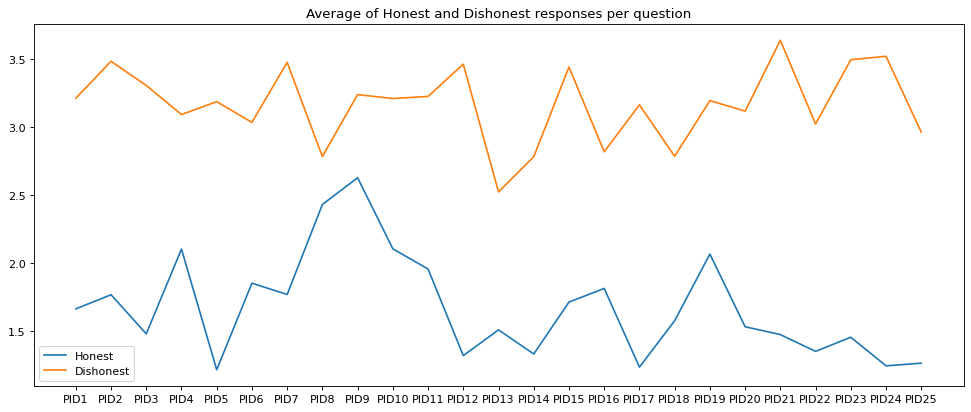

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(15, 6), dpi=80)
plt.plot(honest_means, label = 'Honest')
plt.plot(dishonest_means, label = 'Dishonest')
plt.title('Average of Honest and Dishonest responses per question')
plt.legend()
plt.show()

In [ ]:
# Calculate overall score 
dfSPD['TotalScore']=dfSPD[input_variables].sum(axis=1)

In [ ]:
# Average score for each response
dfSPD['Average_Score']=dfSPD[input_variables].mean(axis=1)

In [ ]:
# Mean of average score of all responses based on condition Honest or Dishonest
dfSPD.groupby(["CONDITION"])['Average_Score'].mean()

CONDITION
D    3.167245
H    1.675761
Name: Average_Score, dtype: float64

In [ ]:
# Standard deviation of average score of all responses based on condition Honest or Dishonest
dfSPD.groupby(["CONDITION"])['Average_Score'].std()

CONDITION
D    0.530465
H    0.306497
Name: Average_Score, dtype: float64

In [ ]:
NAff = dfSPD[NegAff]

NAff['AverageScore'] = NAff.sum(axis=1)/5
avg_score_NAff = NAff.groupby(["CONDITION"])['AverageScore'].mean()
std_score_NAff = NAff.groupby(["CONDITION"])['AverageScore'].std()

print('Average score: ')
print(avg_score_NAff)

print('Standard deviation: ')
print(std_score_NAff)

Average score: 
CONDITION
D    3.179961
H    2.167630
Name: AverageScore, dtype: float64
Standard deviation: 
CONDITION
D    0.674682
H    0.496972
Name: AverageScore, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Detachment = dfSPD[Det]

Detachment['AverageScore'] = Detachment.sum(axis=1)/5
avg_score_Det = Detachment.groupby(["CONDITION"])['AverageScore'].mean()
std_score_Det = Detachment.groupby(["CONDITION"])['AverageScore'].std()

print('Average score: ')
print(avg_score_Det)

print('Standard deviation: ')
print(std_score_Det)

Average score: 
CONDITION
D    2.800771
H    1.668208
Name: AverageScore, dtype: float64
Standard deviation: 
CONDITION
D    0.779763
H    0.491207
Name: AverageScore, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Antagonism = dfSPD[Ant]

Antagonism['AverageScore'] = Antagonism.sum(axis=1)/5
avg_score_Ant = Antagonism.groupby(["CONDITION"])['AverageScore'].mean()
std_score_Ant = Antagonism.groupby(["CONDITION"])['AverageScore'].std()

print('Average score: ')
print(avg_score_Ant)

print('Standard deviation: ')
print(std_score_Ant)

Average score: 
CONDITION
D    3.092486
H    1.491329
Name: AverageScore, dtype: float64
Standard deviation: 
CONDITION
D    0.839425
H    0.402960
Name: AverageScore, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Disinhibition = dfSPD[Dis]

Disinhibition['AverageScore'] = Disinhibition.sum(axis=1)/5
avg_score_Dis = Disinhibition.groupby(["CONDITION"])['AverageScore'].mean()
std_score_Dis = Disinhibition.groupby(["CONDITION"])['AverageScore'].std()

print('Average score: ')
print(avg_score_Dis)

print('Standard deviation: ')
print(std_score_Dis)

Average score: 
CONDITION
D    3.244701
H    1.597303
Name: AverageScore, dtype: float64
Standard deviation: 
CONDITION
D    0.724000
H    0.454315
Name: AverageScore, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
Psychoticism = dfSPD[Psy]

Psychoticism['AverageScore'] = Psychoticism.sum(axis=1)/5
avg_score_Psy = Psychoticism.groupby(["CONDITION"])['AverageScore'].mean()
std_score_Psy = Psychoticism.groupby(["CONDITION"])['AverageScore'].std()

print('Average score: ')
print(avg_score_Psy)

print('Standard deviation: ')
print(std_score_Psy)

Average score: 
CONDITION
D    3.518304
H    1.454335
Name: AverageScore, dtype: float64
Standard deviation: 
CONDITION
D    0.660607
H    0.474907
Name: AverageScore, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The table below shows mean and standard deviation of our data and each domain based on honest and dishonest responses. As we can see, dishonest responses have significant higher values compare to honest responses. In particular, in terms of dishonest responses, Psychoticism had the highest value.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">Domain</th>
    <th class="tg-c3ow" colspan="2">All</th>
    <th class="tg-c3ow" colspan="2">Negative Affect</th>
    <th class="tg-c3ow" colspan="2">Detachment</th>
    <th class="tg-c3ow" colspan="2">Antagonism</th>
    <th class="tg-c3ow" colspan="2">Disinhibition</th>
    <th class="tg-c3ow" colspan="2">Psychoticism</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow"></td>
    <td class="tg-c3ow">Mean</td>
    <td class="tg-c3ow">STD</td>
    <td class="tg-c3ow">Mean</td>
    <td class="tg-c3ow">STD</td>
    <td class="tg-c3ow">Mean</td>
    <td class="tg-c3ow">STD</td>
    <td class="tg-c3ow">Mean</td>
    <td class="tg-c3ow">STD</td>
    <td class="tg-0pky">Mean</td>
    <td class="tg-0pky">STD</td>
    <td class="tg-0pky">Mean</td>
    <td class="tg-0pky">STD</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Honest</td>
    <td class="tg-c3ow">1.68</td>
    <td class="tg-c3ow">0.31</td>
    <td class="tg-c3ow">2.17</td>
    <td class="tg-c3ow">0.5</td>
    <td class="tg-c3ow">1.67</td>
    <td class="tg-c3ow">0.49</td>
    <td class="tg-c3ow">1.49</td>
    <td class="tg-c3ow">0.49</td>
    <td class="tg-0pky">1.6</td>
    <td class="tg-0pky">0.45</td>
    <td class="tg-0pky">1.45</td>
    <td class="tg-0pky">0.47</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Dishonest</td>
    <td class="tg-c3ow">3.17</td>
    <td class="tg-c3ow">0.53</td>
    <td class="tg-c3ow">3.18</td>
    <td class="tg-c3ow">0.67</td>
    <td class="tg-c3ow">2.8</td>
    <td class="tg-c3ow">0.78</td>
    <td class="tg-c3ow">3.1</td>
    <td class="tg-c3ow">0.83</td>
    <td class="tg-0pky">3.24</td>
    <td class="tg-0pky">0.72</td>
    <td class="tg-fymr"><b>3.52</b></td>
    <td class="tg-fymr"><b>0.66</b></td>
  </tr>
</tbody>
</table>

### Percentage of change

In this section, we define a function to calculate the percentage of people who changed or remained the same their answers in the second response.

In [ ]:
# Define a function to calculate the percentage of change
def change_percentage(honest_data, dishonest_data):
  same_list = []
  increase_list = []
  for i in range(honest_data.shape[0]):
    same_count = 0 
    increase_count = 0

    for j in range(honest_data.shape[1]):
      if honest_data.iloc[i][j] == dishonest_data.iloc[i][j]:
        same_count += 1
      elif honest_data.iloc[i][j] < dishonest_data.iloc[i][j]:
        increase_count += 1

    same_list.append(same_count)
    increase_list.append(increase_count)
    # Calculate percentage of unchange 
    unchange = (same_list.count(honest_data.shape[1])/len(same_list))*100

    # Index of people who are unchanged their answer
    idx = [i for i, x in enumerate(same_list) if x == honest_data.shape[1]]

    # Calculate increase
    increase = ((len(increase_list) - increase_list.count(0))/len(increase_list))*100

  return idx, round(unchange, 2), round(increase, 2), same_list.count(honest_data.shape[1]), len(increase_list) - increase_list.count(0)

In [ ]:
# All data
all_data_honest = dfSPD.loc[dfSPD.CONDITION == 'H']
all_data_dishonest = dfSPD.loc[dfSPD.CONDITION == 'D']
all_data_dishonest = all_data_dishonest.reset_index(drop=True)
idx, unchanged, increase, num_same, num_increase = change_percentage(all_data_honest, all_data_dishonest)
print('Unchanged: {}%, Increase: {}%'.format(unchanged, increase))
print('Number of people who kept the same answers for 25 questions: {}'.format(num_same))
print('Index of people who did not change their answer: {}'.format(idx))
print('Number of people who increased the score in their answer(s): {}'.format(num_increase))

Unchanged: 0.0%, Increase: 100.0%
Number of people who kept the same answers for 25 questions: 0
Index of people who did not change their answer: []
Number of people who increased the score in their answer(s): 519


In [ ]:
# Negative Affect
NAff_honest = NAff[NA].loc[(NAff.CONDITION == 'H')]
NAff_dishonest = NAff[NA].loc[(NAff.CONDITION == 'D')]
NAff_dishonest = NAff_dishonest.reset_index(drop=True)
idx, unchanged, increase, num_same, num_increase = change_percentage(NAff_honest, NAff_dishonest)
print('Unchanged: {}%, Increase: {}%'.format(unchanged, increase))
print('Number of people who did not change their answers for Negative Affect questions: {}'.format(num_same))
print('Index of people who did not change their answer: {}'.format(idx))
print('Number of people who increased the score in their answer(s): {}'.format(num_increase))

Unchanged: 0.19%, Increase: 97.88%
Number of people who did not change their answers for Negative Affect questions: 1
Index of people who did not change their answer: [323]
Number of people who increased the score in their answer(s): 508


In [ ]:
# Disinhibition
Di_honest = Disinhibition[Di].loc[(Disinhibition.CONDITION == 'H')]
Di_dishonest = Disinhibition[Di].loc[(Disinhibition.CONDITION == 'D')]
Di_dishonest = Di_dishonest.reset_index(drop=True)
idx, unchanged, increase, num_same, num_increase = change_percentage(Di_honest, Di_dishonest)
print('Unchanged: {}%, Increase: {}%'.format(unchanged, increase))
print('Number of people who did not change their answers for Disinhibition questions: {}'.format(num_same))
print('Index of people who did not change their answer: {}'.format(idx))
print('Number of people who increased the score in their answer(s): {}'.format(num_increase))

Unchanged: 0.19%, Increase: 96.92%
Number of people who did not change their answers for Disinhibition questions: 1
Index of people who did not change their answer: [221]
Number of people who increased the score in their answer(s): 503


In [ ]:
# Antagonism
Ant_honest = Antagonism[A].loc[(Antagonism.CONDITION == 'H')]
Ant_dishonest = Antagonism[A].loc[(Antagonism.CONDITION == 'D')]
Ant_dishonest = Ant_dishonest.reset_index(drop=True)
idx, unchanged, increase, num_same, num_increase = change_percentage(Ant_honest, Ant_dishonest)
print('Unchanged: {}%, Increase: {}%'.format(unchanged, increase))
print('Number of people who did not change their answers for Antagonism questions: {}'.format(num_same))
print('Index of people who did not change their answer: {}'.format(idx))
print('Number of people who increased the score in their answer(s): {}'.format(num_increase))

Unchanged: 1.16%, Increase: 94.99%
Number of people who did not change their answers for Antagonism questions: 6
Index of people who did not change their answer: [122, 249, 298, 323, 345, 381]
Number of people who increased the score in their answer(s): 493


In [ ]:
# Detachment
Det_honest = Detachment[De].loc[(Detachment.CONDITION == 'H')]
Det_dishonest = Detachment[De].loc[(Detachment.CONDITION == 'D')]
Det_dishonest = Det_dishonest.reset_index(drop=True)
idx, unchanged, increase, num_same, num_increase = change_percentage(Det_honest, Det_dishonest)
print('Unchanged: {}%, Increase: {}%'.format(unchanged, increase))
print('Number of people who did not change their answers for Detachment questions: {}'.format(num_same))
print('Index of people who did not change their answer: {}'.format(idx))
print('Number of people who increased the score in their answer(s): {}'.format(num_increase))

Unchanged: 0.39%, Increase: 96.15%
Number of people who did not change their answers for Detachment questions: 2
Index of people who did not change their answer: [122, 366]
Number of people who increased the score in their answer(s): 499


In [ ]:
# Psychoticism
Psy_honest = Psychoticism[P].loc[(Psychoticism.CONDITION == 'H')]
Psy_dishonest = Psychoticism[P].loc[(Psychoticism.CONDITION == 'D')]
Psy_dishonest = Det_dishonest.reset_index(drop=True)
idx, unchanged, increase, num_same, num_increase = change_percentage(Psy_honest, Psy_dishonest)
print('Unchanged: {}%, Increase: {}%'.format(unchanged, increase))
print('Number of people who did not change their answers for Psychoticism questions: {}'.format(num_same))
print('Index of people who did not change their answer: {}'.format(idx))
print('Number of people who increased the score in their answer(s): {}'.format(num_increase))

Unchanged: 0.77%, Increase: 97.11%
Number of people who did not change their answers for Psychoticism questions: 4
Index of people who did not change their answer: [144, 314, 315, 496]
Number of people who increased the score in their answer(s): 504


Table for percentage of change

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{border-color:inherit;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-c3ow">Domain</th>
    <th class="tg-c3ow">Negative Affect</th>
    <th class="tg-c3ow">Detachment</th>
    <th class="tg-c3ow">Antagonism</th>
    <th class="tg-c3ow">Disinhibition</th>
    <th class="tg-c3ow">Psychoticism</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-c3ow">Unchanged</td>
    <td class="tg-c3ow">0.19%</td>
    <td class="tg-c3ow">0.19%</td>
    <td class="tg-7btt"><b>1.16%</b></td>
    <td class="tg-c3ow">0.39%</td>
    <td class="tg-c3ow">0.77%</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Increase</td>
    <td class="tg-7btt"><b>97.88%</b></td>
    <td class="tg-c3ow">96.92%</td>
    <td class="tg-c3ow">94.99%</td>
    <td class="tg-c3ow">96.15%</td>
    <td class="tg-c3ow">97.11%</td>
  </tr>
</tbody>
</table>

As we can see that among five domains, Antagonism had the highest percentage of people who did not change their answers and Negative Affect had the highest percentage of people who increased their scores for all five questions when changes from honest to dishonest responses, followed by Psychoticism with a slightly lower value.

Next, for a more detailed look, we can calculate the percentage of people who increased, decreased or remained the same their answers for each question.

In [ ]:
# Each question
same_answer = {}
different_answer = {}
count_unchanged = []
count_increase = []

for question in input_variables:
  ans_honest = dfSPD[question].loc[(dfSPD.CONDITION == 'H')]
  ans_honest = pd.DataFrame(ans_honest)
  ans_dishonest = dfSPD[question].loc[(dfSPD.CONDITION == 'D')]
  ans_dishonest = ans_dishonest.reset_index(drop=True)
  ans_dishonest = pd.DataFrame(ans_dishonest)
  idx, unchanged, increase, num_same, num_increase = change_percentage(ans_honest, ans_dishonest)
  same_answer[question] = unchanged
  different_answer[question] = increase
  count_unchanged.append(num_same)
  count_increase.append(num_increase)
  #print('Unchanged: {}%, Increase: {}%'.format(unchanged, increase))
  #print('Number of people who did not change their answers in questions {}: {}'.format(question, num_same))
  #print('Index of people who did not change their answer in question {}: {}'.format(question, idx))
  #print('Number of people who increased the score in their answer(s): {}'.format(num_increase))

In [ ]:
# Create suitable dataframe includes the percentage of people who change their answers or not
same_answer_df = pd.DataFrame(same_answer.items(), columns=['Question', 'Same'])
increase_answer_df = pd.DataFrame(different_answer.items(), columns=['Question', 'Increase'])
frames = [same_answer_df, increase_answer_df]
result = pd.concat(frames, axis=1)
change_df = pd.DataFrame(result)
change_df = change_df.loc[:,~change_df.columns.duplicated()]
change_df['Decrease'] = 100 - change_df['Increase'] - change_df['Same'] 
#print(change_df)

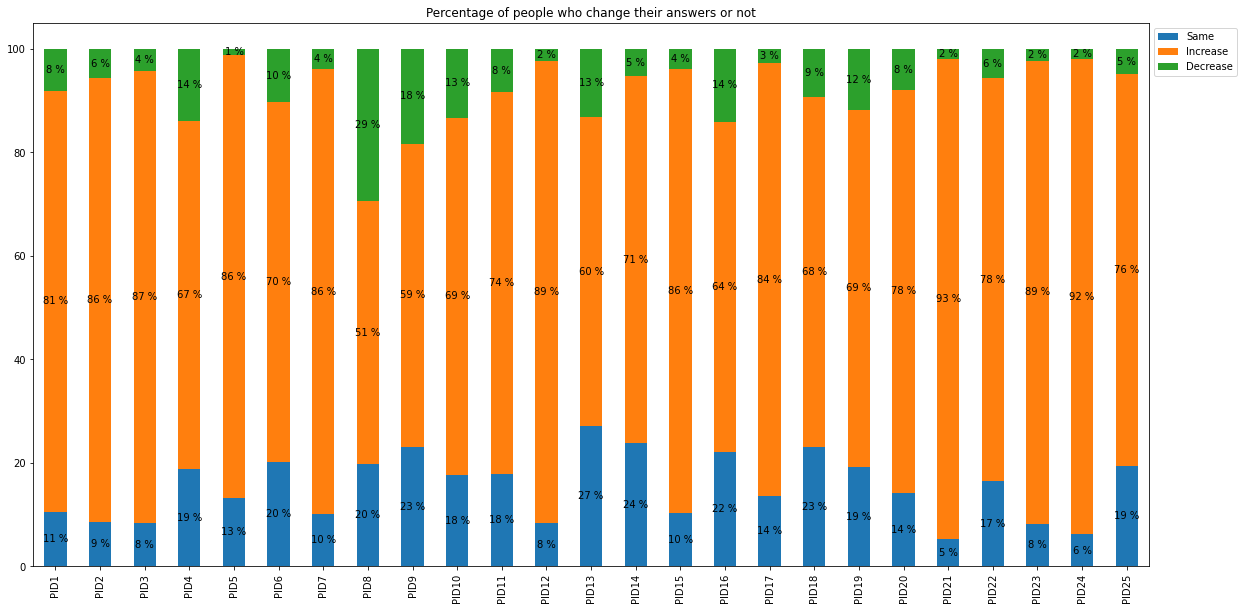

In [ ]:
# Plot the dataframe above
ax = change_df.plot.bar(stacked = True, mark_right = True, figsize = (20, 10), 
                 title = 'Percentage of people who change their answers or not')
plt.xticks(range(0,len(input_variables)), input_variables)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

As we can see on the graph above, most of the cases people chose to increase their score when they changed from honest to dishonest response. But there was still a significant high value of people who decreased their score, it was the question PID8 which is "I worry about almost everything" and it belongs to the Negative Affect domain. To explain this, somehow people think that a person with mental disorder seems like does not worry about everything.

Percentage of the most five questions which people keep the same or increase score in their answers


In [ ]:
sort_same_answer = dict(sorted(same_answer.items(), key=lambda x: x[1], reverse=True))
sort_different_answer = dict(sorted(different_answer.items(), key=lambda x: x[1], reverse=True))

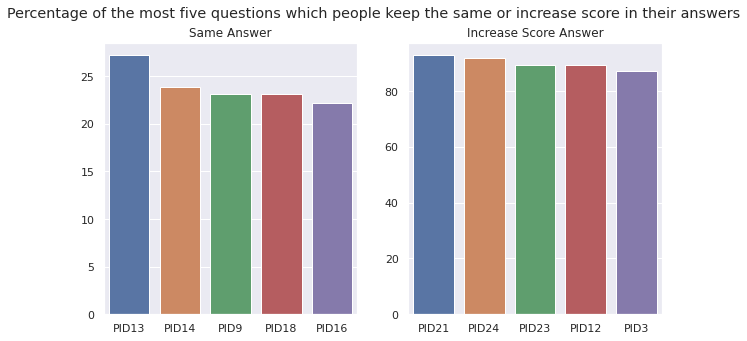

In [ ]:
sns.set()

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(10, 5))
fig.suptitle('Percentage of the most five questions which people keep the same or increase score in their answers')

keys1 = list(sort_same_answer.keys())
keys1 = keys1[0:5]
vals1 = [sort_same_answer[k] for k in keys1]
sns.barplot(ax = axes[0], x=keys1, y=vals1)
axes[0].set_title('Same Answer')

keys2 = list(sort_different_answer.keys())
keys2 = keys2[0:5]
vals2 = [sort_different_answer[k] for k in keys2]
sns.barplot(ax = axes[1], x=keys2, y=vals2)
axes[1].set_title('Increase Score Answer')

plt.show()

On the same answer graph, the most five questions people have a tendency to keep the same answer are PID13, PID14, PID9, PID18 and PID16. Except the PID9, 4 remaining questions belong to the Detachment domain which somehow can show the less important of Detachment domain with the mental disorder trait. 

The graph on the right show the most five questions people have a tendency to increase their score, which are PID21, PID24, PID23, PID12 and PID3. Except the PID3, 4 remaining questions belong to the Psychoticism domain which can be easily understood that when they pretend to have mental disorder, people have a tendency to increase their score in the questions belong to the Psychoticism domain.

Stacked bar graphs show the percentage of the frequency of the answers between honest and dishonest responses.

In [ ]:
from collections import OrderedDict

# Define a function to calculate the frequency based on the answers from 25 questions
def frequency_data(data):
  freq = {}
  for col in data.columns:
    if col not in ['CONDITION']:
      freq[col] = {}
      count = data[col].value_counts(sort=False)
      dict_count = dict(count)
      for i in range(4):
        if (i+1) not in list(dict_count.keys()):
          freq[col][i+1] = 0
        else:
          freq[col][i+1] = dict_count[i+1]

    # Order by value
    sort_freq = OrderedDict(sorted(freq.items(), key=lambda i: -i[1][1]))

    # Convert to dataframe
    freq_data = pd.DataFrame(sort_freq)
    
  return freq_data.T

In [ ]:
def bar_chart(honest_freq, dishonest_freq):
  sns.set()

  fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

  # For honest dataframe
  honest_freq.plot(kind = 'barh', stacked = True, mark_right = True, figsize = (20, 10), ax=ax1,
                 title = 'Percentage Stacked Bar Graph - Honest Frequency')
  honest_freq_total = honest_freq.sum(axis = 1)
  honest_freq_percentage = honest_freq.div(honest_freq_total, 0)*100

  for n in honest_freq_percentage:
    for i, (cs, ab, pc) in enumerate(zip(honest_freq.cumsum(1)[n], honest_freq[n], honest_freq_percentage[n])):
      if pc > 5: # Do not show the percentage for those values <= 5%
        ax1.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'center') 

  # For dishonest dataframe
  dishonest_freq.plot(kind = 'barh', stacked = True, mark_right = True, figsize = (20, 10), ax=ax2,
                 title = 'Percentage Stacked Bar Graph - Dishonest Frequency')
  dishonest_freq_total = dishonest_freq.sum(axis = 1)
  dishonest_freq_percentage = dishonest_freq.div(dishonest_freq_total, 0)*100

  for n in dishonest_freq_percentage:
    for i, (cs, ab, pc) in enumerate(zip(dishonest_freq.cumsum(1)[n], dishonest_freq[n], dishonest_freq_percentage[n])):
      if pc > 5: # Do not show percentage for those values <= 5%
        ax2.text(cs - ab/2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'center') 

  ax1.get_legend().remove()
  ax2.get_legend().remove()
  handles, labels = ax1.get_legend_handles_labels()
  fig.legend(handles, likert_scale, loc='lower center', ncol = 4)

In [ ]:
avg_negaff = NAff.AverageScore
avg_detach = Detachment.AverageScore
avg_antag = Antagonism.AverageScore
avg_dis = Disinhibition.AverageScore
avg_psy = Psychoticism.AverageScore
avg_cond = dfSPD.CONDITION
average_data = {'NegAff':avg_negaff, 'Det':avg_detach, 'Ant':avg_antag, 'Dis':avg_dis, 'Psy':avg_psy, 'CONDITION':avg_cond}
average_df = pd.DataFrame(average_data)

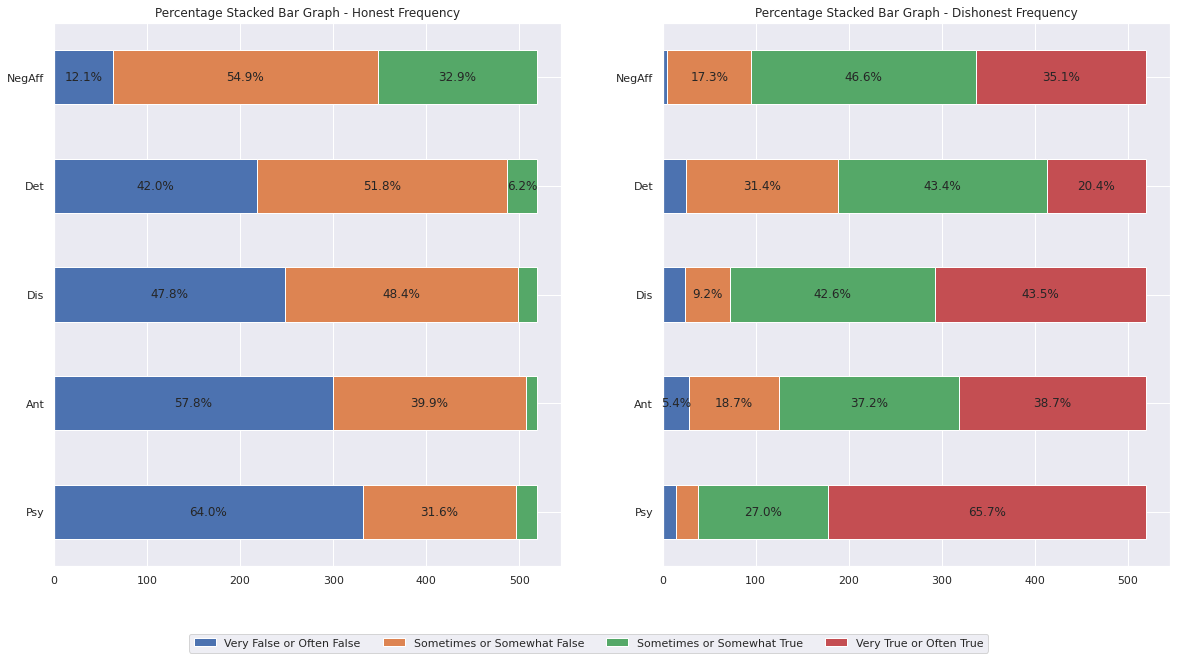

In [ ]:
# Calculating the frequency based on honest data
honest_data = average_df.loc[average_df.CONDITION == 'H']
honest_df = round(honest_data)
honest_freq = frequency_data(honest_df)

# Calculating the frequency based on dishonest data
dishonest_data = average_df.loc[average_df.CONDITION == 'D']
dishonest_df = round(dishonest_data)
dishonest_freq = frequency_data(dishonest_df)
dishonest_freq = dishonest_freq.reindex(honest_freq.index)

bar_chart(honest_freq, dishonest_freq)

Distribution of each domain based on honest and dishonest responses.

In [ ]:
dfSPD['NegAff']=dfSPD[NegAff].sum(axis = 1)/5
dfSPD['Det']=dfSPD[Det].sum(axis = 1)/5
dfSPD['Anta']=dfSPD[Ant].sum(axis = 1)/5
dfSPD['Disi']=dfSPD[Dis].sum(axis = 1)/5
dfSPD['Psycho']=dfSPD[Psy].sum(axis = 1)/5
dfSPD['avgTotal'] = dfSPD[input_variables].sum(axis = 1)/25

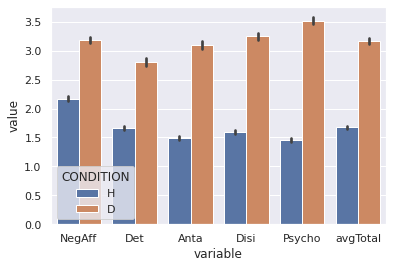

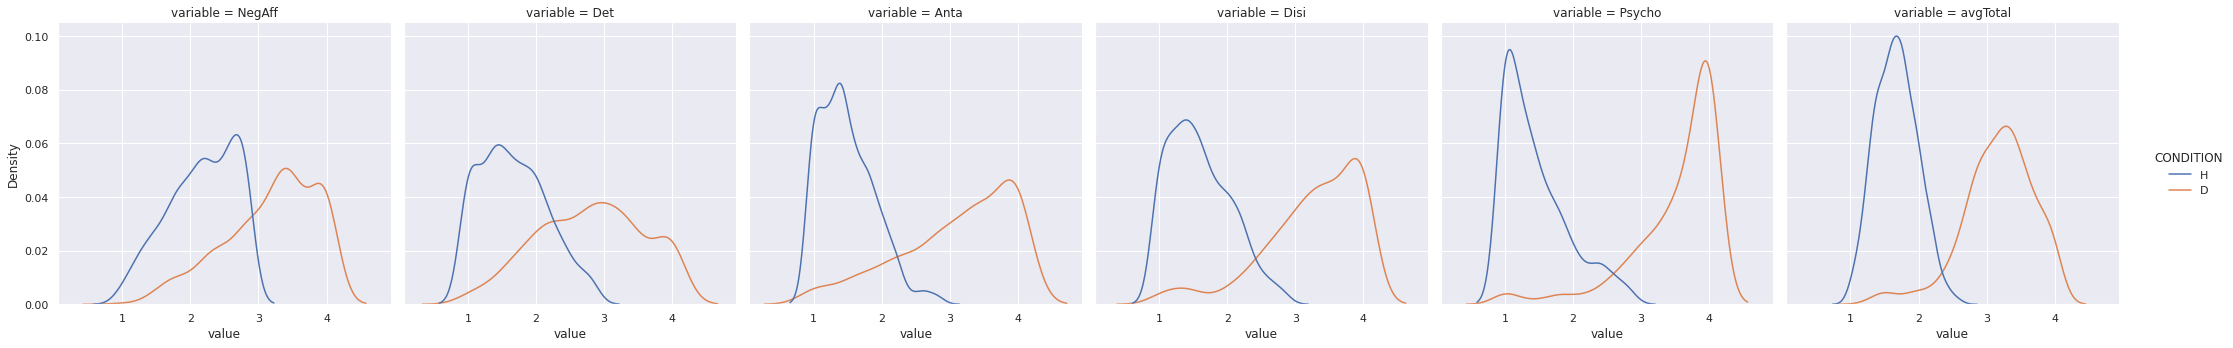

In [ ]:
diffPlot = dfSPD[['NegAff','Det','Anta','Disi','Psycho','avgTotal','CONDITION']]
diffPlot = pd.melt(diffPlot,id_vars=["CONDITION"])
sns.barplot(x='variable',y='value', hue = 'CONDITION', data = diffPlot)
sns.displot(x='value',col = "variable",  hue="CONDITION",kind="kde",data=diffPlot)

This is the distribution plots of the honest and dishonest responses, a significant different belongs to the Psychoticism domain and Antagonism. While there is no significant different in the Negative Affect which can be explained that if alone Negative Affect, it's not reliable to distinguish Honest and Dishonest response.

# Modeling

In this part, we used some machine learning algorithms to model our data for distinguish fake responses and reconstruct these fake responses to honest responses.

In [ ]:
X = dfSPD[input_variables].to_numpy()
y = dfSPD[target_variable_binary].to_numpy()
y = y.astype('int')

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Classification

### Decision Tree

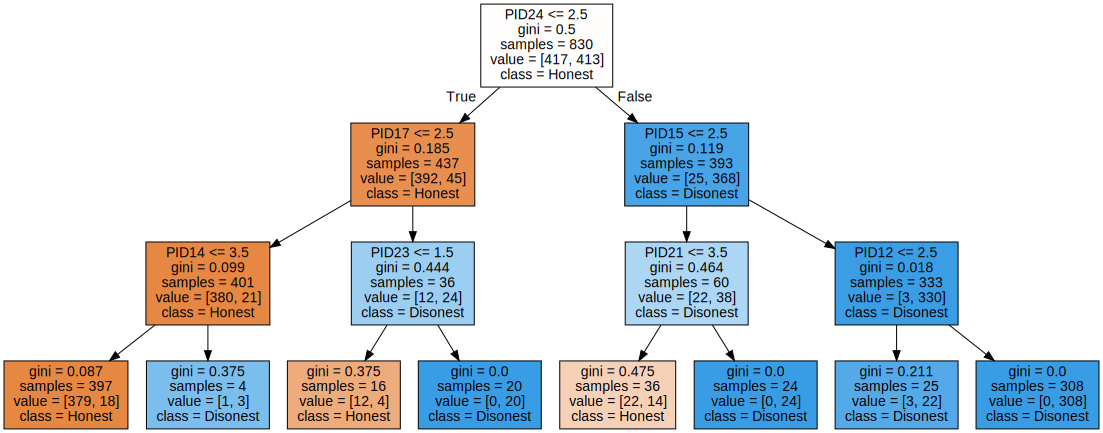

In [ ]:
# specify a decision tree with a maximum depth
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# DOT data
y_labels = ['Honest', 'Disonest']
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=input_variables,  
                                class_names=y_labels,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

As we can see on the graph, our tree has the maximum depth is 3. At the top most of the tree is the root node which evaluates the variable that best splits the data, which is the question PID24.

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of decision tree classifier on test set: 0.94


In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n', conf_matrix)

Confusion matrix : 
 [[99  3]
 [ 9 97]]


### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=300, random_state=1)

In [ ]:
y_pred = mlp.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of decision tree classifier on test set: 0.96


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n', conf_matrix)

Confusion matrix : 
 [[ 98   4]
 [  4 102]]


### Bayesian Rule Classifier

Bayesian Rule List classifier is an algorithm for building probabilistic rule lists. They have a logical structure that is a sequence of IF-THEN rules. The IF-THEN statement consisting of a condition and a prediction. For example: IF it rains today AND if it is April (Condition), THEN it will rain tomorrow (Prediction). 

In [ ]:
import imodels
np.random.seed(13)
# train classifier (allow more iterations for better accuracy; use BigDataRuleListClassifier for large datasets)
print('training bayesian_rule_list...')
brl = imodels.BayesianRuleListClassifier(listlengthprior=5, max_iter=10000, class1label="Dishonest", verbose=False)
brl.fit(X_train, y_train, feature_names=input_variables)
print(brl)

training bayesian_rule_list...
Trained RuleListClassifier for detecting Dishonest
IF PID21 <= 2.5 and PID25 <= 1.5 THEN probability of Dishonest: 3.9% (2.0%-6.4%)
ELSE IF PID12 > 3.5 THEN probability of Dishonest: 99.6% (98.6%-100.0%)
ELSE IF PID2 > 3.5 THEN probability of Dishonest: 98.2% (93.6%-100.0%)
ELSE IF PID17 > 2.5 and PID5 > 2.5 THEN probability of Dishonest: 94.7% (85.8%-99.3%)
ELSE IF PID20 > 3.5 THEN probability of Dishonest: 90.5% (75.1%-98.8%)
ELSE IF PID18 > 3.5 THEN probability of Dishonest: 80.0% (51.8%-97.2%)
ELSE IF PID24 <= 3.5 and PID24 > 2.5 THEN probability of Dishonest: 33.3% (16.4%-52.9%)
ELSE IF PID24 > 3.5 THEN probability of Dishonest: 87.5% (59.0%-99.6%)
ELSE probability of Dishonest: 4.5% (1.5%-9.0%)



In [ ]:
y_pred = brl.predict(X_test)
print('Accuracy of Bayesian Rule Classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of Bayesian Rule Classifier on test set: 0.92


### Logistic Regression

In [ ]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.94


In [ ]:
feature_importance=pd.DataFrame({'feature':input_variables,'feature_importance':[abs(i) for i in lr.coef_[0]]})
sort_fi = feature_importance.sort_values('feature_importance',ascending=False)
sort_fi = sort_fi.reset_index(drop=True)
print('The most five features importance:')
print(sort_fi.head())

The most five features importance:
  feature  feature_importance
0   PID24            0.756316
1    PID5            0.675789
2   PID21            0.661633
3   PID12            0.481935
4   PID25            0.443861


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n', conf_matrix)

Confusion matrix : 
 [[ 96   6]
 [  6 100]]


### K-Means

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print('Accuracy of K-Means on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of K-Means on test set: 0.96


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n', conf_matrix)

Confusion matrix : 
 [[100   2]
 [  7  99]]


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = random_forest.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of decision tree classifier on test set: 0.96


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix : \n', conf_matrix)

Confusion matrix : 
 [[ 99   3]
 [  6 100]]


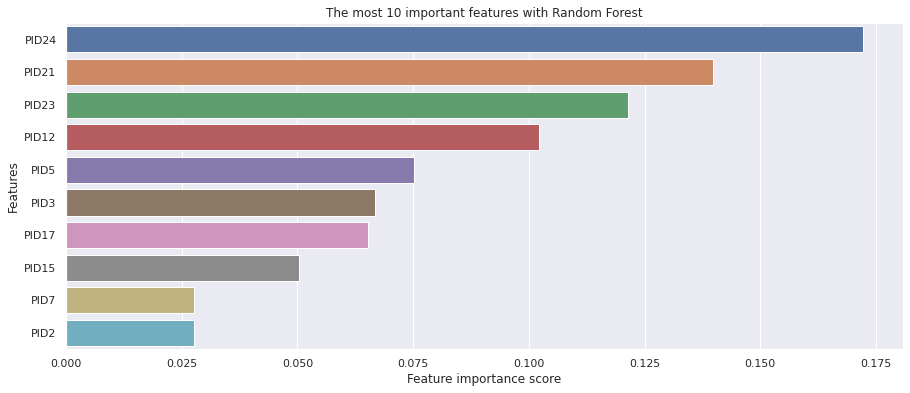

In [ ]:
# Extract important features 
importances_rf = random_forest.feature_importances_
forest_importances = pd.Series(importances_rf, index=input_variables).sort_values(ascending=False)
forest_importances = forest_importances[:10]

f, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x=forest_importances, y=forest_importances.index)
ax.set_title("The most 10 important features with Random Forest")
ax.set_yticklabels(forest_importances.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
X_pca = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [ ]:
# Splitting the data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalComponents, y, test_size=0.2, random_state=2)

In [ ]:
random_forest_pca = RandomForestClassifier(n_estimators=100)
random_forest_pca.fit(X_train_pca,y_train_pca)
y_pred_pca = random_forest_pca.predict(X_test_pca)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(accuracy_score(y_test_pca, y_pred_pca)))

Accuracy of decision tree classifier on test set: 0.97


## Multioutput Regressor

### Trivial Solution

In [ ]:
Hon = dfSPD[dfSPD["CONDITION"]=="H"].reset_index()
Diso = dfSPD[dfSPD["CONDITION"]=="D"].reset_index()

Honnp = Hon[input_variables].to_numpy()
Disnp = Diso[input_variables].to_numpy()

Hon = Hon.add_suffix('_H')
Diso = Diso.add_suffix('_D')

Tri = pd.concat([Hon,Diso],axis = 1)
Tri['DIFFTot']= Tri.avgTotal_D-Tri.avgTotal_H
Tri['DIFFNegAff']= Tri.NegAff_D-Tri.NegAff_H
Tri['DIFFDet']= Tri.Det_D-Tri.Det_H
Tri['DIFFAnta']= Tri.Anta_D-Tri.Anta_H
Tri['DIFFDisi']= Tri.Disi_D-Tri.Disi_H
Tri['DIFFPsycho']= Tri.Disi_D-Tri.Disi_H
Tri['DIFFPsycho']= Tri.Psycho_D-Tri.Psycho_H

avgdiff = Tri['DIFFTot'].mean()


In [ ]:
#input_var_D = [sub + "_D" for sub in input_variables]
#input_var_H = [sub + "_H" for sub in input_variables]

error_MOR = Disnp - avgdiff
error_MOR = abs(Honnp-error_MOR)

#print(np.sum(error_MOR))
print('The mean of the error is {}'.format(error_MOR.mean()))

print('The STD of the error is {}'.format(error_MOR.std()))

print('The accuracy with the trivial solution: {}%'.format(round(np.sum(Disnp-1==Honnp)*100/(519*25),2)))
#print('The accuracy with the trivial solution: {}'.format(np.sum((Disnp-avgdiff).round()==Honnp)/(519*25)))
#print(np.sum((Disnp==Honnp))/(519*25))

The mean of the error is 1.1483144775969798
The STD of the error is 0.7411720542045783
The accuracy with the trivial solution: 21.01%


### XGBOOST

In [ ]:
Dishonest_train, Dishonest_test, Honest_train, Honest_test = train_test_split(Disnp, Honnp, test_size=0.10, random_state=5)

In [ ]:
MultiXG = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror'))

MultiXG.fit(Dishonest_train, Honest_train)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


MultiOutputRegressor(estimator=XGBRegressor(objective='reg:squarederror'))

In [ ]:
Honest_pred = MultiXG.predict(Disnp) 

predictions = [value.round() for value in Honest_pred] 

In [ ]:
acc_MOR = 0
error_MOR = np.zeros(Honest_test.shape)
error_MOR =  abs(Honnp-Honest_pred)
for i in range(len(Honest_test)):
  acc_MOR += np.sum(predictions[i]==Honnp[i])

print('The mean of the error is {}'.format(error_MOR.mean()))
print('The STD of the error is {}'.format(error_MOR.std()))
print("Accuracy: %.2f%%" % (acc_MOR/(len(Honest_test)*25) * 100.0))

The mean of the error is 0.43786326141026666
The STD of the error is 0.36484407012321785
Accuracy: 67.31%


### Multioutput regressors


Taking as input a faked response of subject 1 and predict the honest response of the same subject.

In [ ]:
est = LinearSVR()

clf = MultiOutputRegressor(est)
clf.fit(Dishonest_train, Honest_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

MultiOutputRegressor(estimator=LinearSVR())

In [ ]:
clf.predict(Dishonest_test[[0]])
clf.score(Dishonest_test, Honest_test, sample_weight=None)
acc_MOR = 0
error_MOR = np.zeros(Disnp.shape)

for i in range(len(Disnp)):
  acc_MOR += np.sum(clf.predict(Disnp[[i]]).round()==Honnp[i])
  error_MOR[i] = abs(Honnp[i]-clf.predict(Disnp[[i]]))

print('The mean of the error is {}'.format(error_MOR.mean()))
print('The STD of the error is {}'.format(error_MOR.std()))
print('The accuracy with the Multioutput Regression for  %.2f%%' % (acc_MOR/(519*25)*100))

#This method doesnt provide us accurate Answers

The mean of the error is 0.5304320158020025
The STD of the error is 0.626649143861282
The accuracy with the Multioutput Regression for  57.29%


### Neural Networks

In [ ]:
x = Disnp.reshape(Disnp.shape[0], Disnp.shape[1], 1)
in_dim = (x.shape[1], x.shape[2])
out_dim = Honnp.shape[1]
print("x:", x.shape, "y:", Honnp.shape)

Dishonest_train, Dishonest_test, Honest_train, Honest_test=train_test_split(x, Honnp, test_size=0.15)

x: (519, 25, 1) y: (519, 25)


In [ ]:
# evaluate a model using repeated k-fold cross-validation
from keras import backend as BK
from keras.layers import Dense, LSTM
def mapping_to_target_range( x, target_min=1, target_max=4 ) :
    x02 = BK.tanh(x) + 1 # x in range(0,2)
    scale = ( target_max-target_min )/2.
    return  x02 * scale + target_min

modelNN = Sequential()
modelNN.add(LSTM(64, input_shape=in_dim, activation="relu"))
modelNN.add(Dense(out_dim))
modelNN.compile(loss="mse", optimizer="adam") 
#model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
modelNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
Total params: 18,521
Trainable params: 18,521
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
4/4 [==============================] - 2s 127ms/step - loss: 3.7088 - val_loss: 3.3011
Epoch 2/100
4/4 [==============================] - 0s 33ms/step - loss: 3.4879 - val_loss: 3.0981
Epoch 3/100
4/4 [==============================] - 0s 36ms/step - loss: 3.2761 - val_loss: 2.8862
Epoch 4/100
4/4 [==============================] - 0s 37ms/step - loss: 3.0400 - val_loss: 2.6235
Epoch 5/100
4/4 [==============================] - 0s 35ms/step - loss: 2.7256 - val_loss: 2.1929
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 2.2596 - val_loss: 1.8731
Epoch 7/100
4/4 [==============================] - 0s 33ms/step - loss: 1.8739 - val_loss: 1.4864
Epoch 8/100
4/4 [==============================] - 0s 35ms/step - loss: 1.5587 - val_loss: 1.2870
Epoch 9/100
4/4 [==============================] - 0s 41ms/step - loss: 1.3527 - val_loss: 1.0829
Epoch 10/100
4/4 [==============================] - 0s 33ms/step - loss: 1.1703 - val_loss: 0.9522
Epoch 11/100
4/4 [

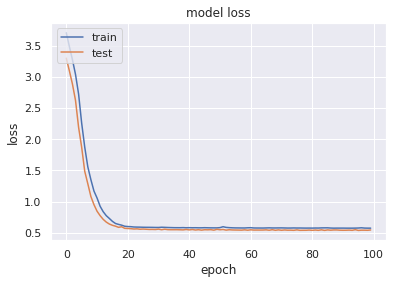

In [ ]:
batch_size = 128
epochs = 100

history = modelNN.fit(Dishonest_train, Honest_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(Dishonest_test, Honest_test))

score = modelNN.evaluate(Dishonest_test, Honest_test, verbose=100)

# list all data in history
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
acc_MOR = 0
error_MOR = np.zeros(Disnp.shape)

for i in range(len(Disnp)):
  yhat = modelNN.predict(Disnp[[i]])
  acc_MOR += np.sum(yhat.round()==Honnp[i])
  error_MOR[i] = abs(Honnp[i]-yhat)

print('The mean of the error is {}'.format(error_MOR.mean()))
print('The STD of the error is {}'.format(error_MOR.std()))
print('The accuracy with the Multioutput Regression for  %.2f%%' % (acc_MOR/(519*25)*100))


The mean of the error is 0.6202631758219475
The STD of the error is 0.4314242900784517
The accuracy with the Multioutput Regression for  48.66%


# Demo

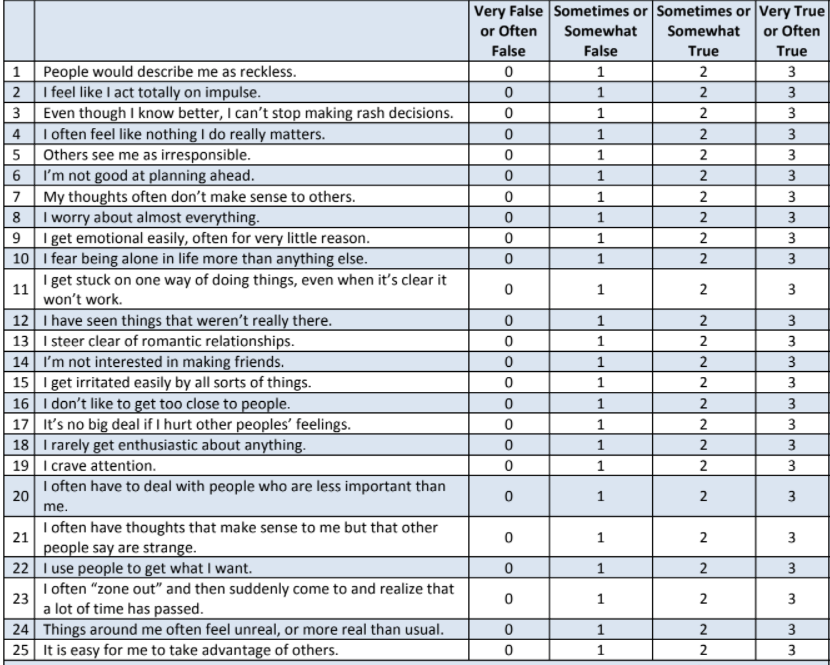

In [ ]:
#@title 
PID1 =  4#@param {type:"integer", min:1, max:4.0}
PID2 = 4 #@param {type:"integer", min:1, max:4}
PID3 = 4 #@param {type:"integer", min:1, max:4}
PID4 = 4 #@param {type:"integer", min:1, max:4}
PID5 = 4 #@param {type:"integer", min:1, max:4}
PID6 = 3 #@param {type:"integer", min:1, max:4}
PID7 = 4 #@param {type:"integer", min:1, max:4}
PID8 = 4 #@param {type:"integer", min:1, max:4}
PID9 = 4 #@param {type:"integer", min:1, max:4}
PID10 = 4 #@param {type:"integer", min:1, max:4}
PID11 = 3 #@param {type:"integer", min:1, max:4}
PID12 = 3 #@param {type:"integer", min:1, max:4}
PID13 = 4 #@param {type:"integer", min:1, max:4}
PID14 = 4 #@param {type:"integer", min:1, max:4}
PID15 = 2 #@param {type:"integer", min:1, max:4}
PID16 = 2 #@param {type:"integer", min:1, max:4}
PID17 = 2 #@param {type:"integer", min:1, max:4}
PID18 = 4 #@param {type:"integer", min:1, max:4}
PID19 = 4 #@param {type:"integer", min:1, max:4}
PID20 =  2#@param {type:"integer", min:1, max:4}
PID21 = 4 #@param {type:"integer", min:1, max:4}
PID22 = 4 #@param {type:"integer", min:1, max:4}
PID23 = 4 #@param {type:"integer", min:1, max:4}
PID24 = 4 #@param {type:"integer", min:1, max:4}
PID25 = 3 #@param {type:"integer", min:1, max:4}

In [ ]:
user_data = [[PID1,PID2,PID3,PID4,PID5,PID6,PID7,PID8,PID9,PID10,PID11,PID12,PID13,PID14,PID15,PID16,PID17,PID18,PID19,PID20,PID21,PID22,PID23,PID24,PID25]]

In [ ]:
MentalDis = {
  1: "Mild",
  2: "Mild",
  3: "Moderate",
  4: "Severe"
}


In [ ]:
user_data = np.array(user_data)
Raw_score = user_data.sum()
print('Total raw score {}'.format(Raw_score))
NA_user = [[PID8,PID9,PID10,PID11,PID15]]
print('The Negative Affection is {}'.format(MentalDis[round(np.array(NA_user).sum()/5)]))
#DETACHMENT
De_user= [[PID4,PID13,PID14,PID16,PID18]]
print('The detachment is {}'.format(MentalDis[round(np.array(De_user).sum()/5)]))
#ANTAGONISM
A_user = [[PID17,PID19,PID20,PID22,PID25]]
print('The antagonism is {}'.format(MentalDis[round(np.array(A_user).sum()/5)]))
#DISINHIBITION
Di_user = [[PID1,PID2,PID3,PID5,PID6]]
print('The disihibition is {}'.format(MentalDis[round(np.array(Di_user).sum()/5)]))
#PSYCHOTICISM
P_user = [PID7,PID12,PID21,PID23,PID24]
print('The pyschoticism is {}'.format(MentalDis[round(np.array(P_user).sum()/5)]))

Total raw score 86
The Negative Affection is Moderate
The detachment is Severe
The antagonism is Moderate
The disihibition is Severe
The pyschoticism is Severe


In [ ]:
LogPre = random_forest.predict(user_data)
if LogPre == 1:
  print("Its a dishonest response")
  print("Your Honest response should be: ")
  modelNN = MultiXG.predict(user_data)
  predictions = [value.round() for value in modelNN] 
  print(predictions)
else:
  print("Honest response")

Its a dishonest response
Your Honest response should be: 
[array([2., 2., 2., 2., 1., 2., 2., 3., 3., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 1.], dtype=float32)]
